## UMAP Visualizations of GeneRIF document embeddings

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from generif2vec.text.util import process_abstracts_file
from gensim.models.doc2vec import Doc2Vec
from umap import UMAP

In [9]:
abstracts_file = '/Users/kevin/projects/generif2vec/data/generif.pubmed.abstracts.df.txt.gz'

### process ~1/8 of the total abstracts

In [4]:
texts, labels = process_abstracts_file(abstracts_file, nrows=100000)
labels = np.array(labels)

2019-12-16 21:52:03.754 | INFO     | generif2vec.text.util:process_abstracts_file:29 - Processed 67848 texts from 1822 unique genes


### convert text tokens to vectors

In [10]:
generif_embeddings_file = '/Users/kevin/projects/generif2vec/generif2vec.doc2vec'
model = Doc2Vec.load(generif_embeddings_file)

In [11]:
vectors = [model.infer_vector(tokens) for tokens in texts]

### Fit UMAP to reduce the dimensions from 100 to 2 for visualization.

In [12]:
umap = UMAP(n_components=2, metric='cosine', min_dist=0.3)

In [14]:
umap_vectors = umap.fit_transform(vectors)

/Users/kevin/.pyenv/versions/miniconda3-4.3.30/envs/generif2vec/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.pyenv/versions/miniconda3-4.3.30/envs/generif2vec/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/Users/kevin/.pyenv/versions/miniconda3-4.3.30/envs/generif2vec/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diag

In [90]:
pd.Series(labels).value_counts().loc['MTOR']

188

In [95]:
gene1 = 'STAT2'
gene2 = 'STAT1'

gene3 = 'MTOR'
gene4 = 'PIK3CA'

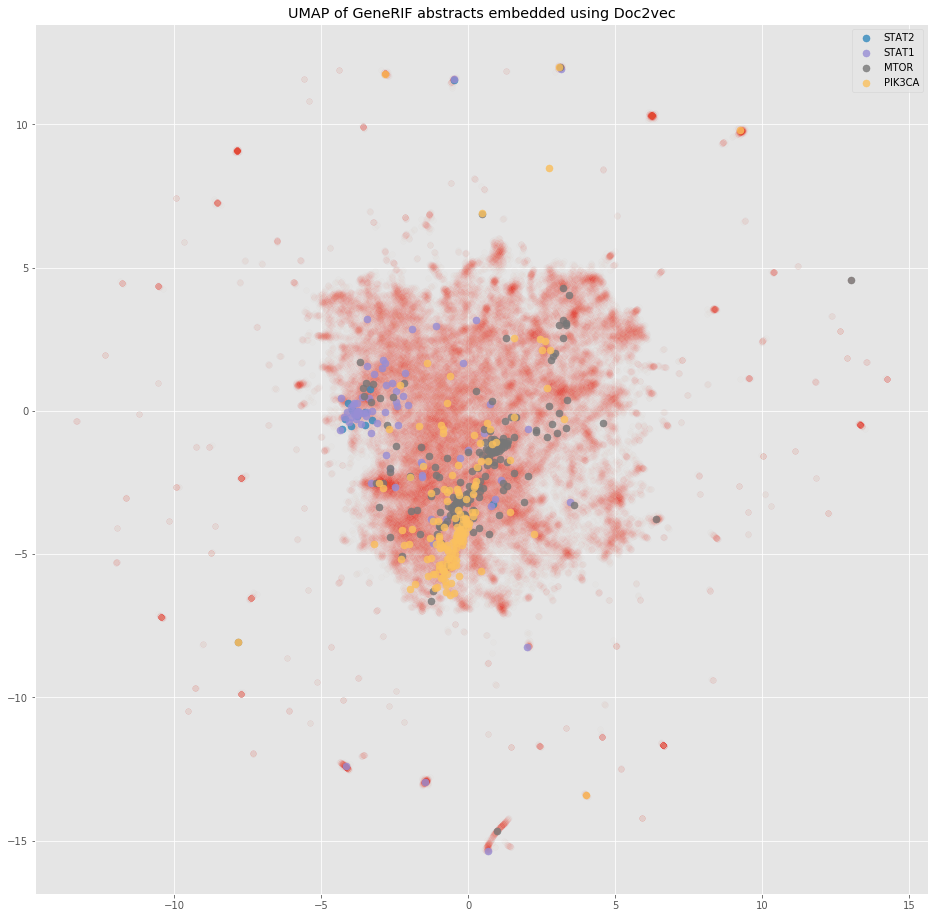

In [97]:
plt.style.use('ggplot');
plt.figure(figsize=(16, 16));
plt.scatter(umap_vectors[:, 0], umap_vectors[:, 1], alpha=0.01);

# highlight some genes
plt.scatter(
    umap_vectors[np.argwhere(labels == gene1), 0],
    umap_vectors[np.argwhere(labels == gene1), 1],
    alpha=0.8,
    label=gene1,
    s=50,
);
plt.scatter(
    umap_vectors[np.argwhere(labels == gene2), 0],
    umap_vectors[np.argwhere(labels == gene2), 1],
    alpha=0.8,
    label=gene2,
    s=50,
);
plt.scatter(
    umap_vectors[np.argwhere(labels == gene3), 0],
    umap_vectors[np.argwhere(labels == gene3), 1],
    alpha=0.8,
    label=gene3,
    s=50,
);
plt.scatter(
    umap_vectors[np.argwhere(labels == gene4), 0],
    umap_vectors[np.argwhere(labels == gene4), 1],
    alpha=0.8,
    label=gene4,
    s=50,
);
plt.title('UMAP of GeneRIF abstracts embedded using Doc2vec')
plt.legend();